# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
y = dataset.iloc[:, -1].values
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [135]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [4]:
y = y.reshape(len(y),1)

In [19]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

### Min Max Scaling

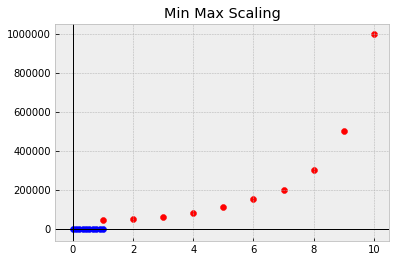

In [151]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
plt.scatter(X,y,color='red')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title('Min Max Scaling')
plt.scatter(scaler.fit_transform(X),scaler.fit_transform(y),color='blue')

### Standard Scaling

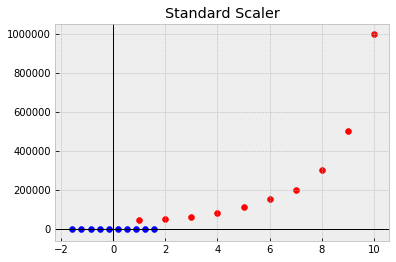

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
plt.scatter(X,y,color='red')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.scatter(scaler.fit_transform(X),scaler.fit_transform(y),color='blue',alpha='1')
plt.title('Standard Scaler')
plt.show()

### Max Abs Scaler

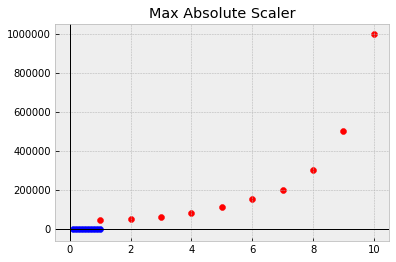

In [59]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
plt.scatter(X,y,color='red')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.scatter(scaler.fit_transform(X),scaler.fit_transform(y),color='blue',alpha='1')
plt.title('Max Absolute Scaler')
plt.show()

### Normalizer

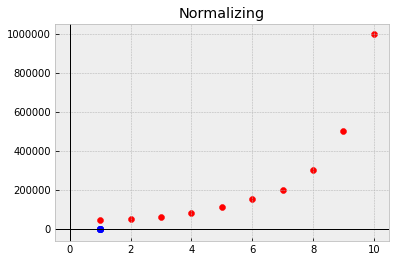

In [58]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
plt.scatter(X,y,color='red')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.scatter(scaler.fit_transform(X),scaler.fit_transform(y),color='blue',alpha='1')
plt.title('Normalizing')
plt.show()

### Robust Scaling

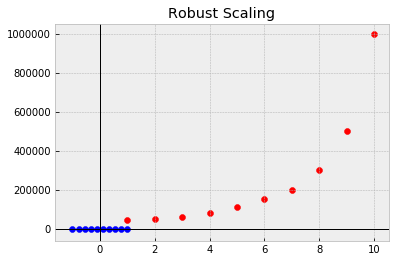

In [57]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
plt.scatter(X,y,color='red')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.scatter(scaler.fit_transform(X),scaler.fit_transform(y),color='blue',alpha='1')
plt.title('Robust Scaling')
plt.show()

In [5]:
#We use standard scaler here
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
print("X: ",X)
print("y: ",y)


X:  [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
y:  [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\SInuganti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [166]:
pred_val=scaler_X.transform([[6.5]])
y_pred = regressor.predict(pred_val)
print(scaler_y.inverse_transform(y_pred))
#sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

[170370.0204065]


## Visualising the SVR results

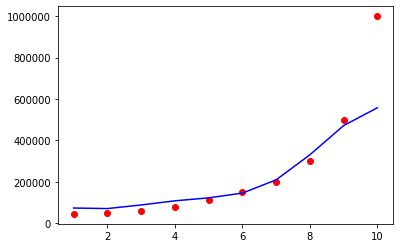

In [7]:
import matplotlib.pyplot as plt
plt.scatter(scaler_X.inverse_transform(X),scaler_y.inverse_transform(y),color='red')
plt.plot(scaler_X.inverse_transform(X),scaler_y.inverse_transform(regressor.predict(X)),color='blue')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

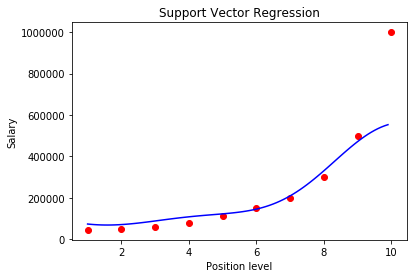

In [9]:
X_grid=np.arange(min(scaler_X.inverse_transform(X)), max(scaler_X.inverse_transform(X)), 0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, scaler_y.inverse_transform(regressor.predict(scaler_X.transform(X_grid))), color = 'blue')
plt.title("Support Vector Regression")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()